In [4]:
from keras.datasets import mnist

In [5]:
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [7]:
from google.colab.patches import cv2_imshow

In [49]:
def build_lenet(width,height,depth,classes):
  model= Sequential()
  model.add(Conv2D(6,(5, 5),padding="valid",input_shape=(height,width,depth)))
  model.add(Activation("tanh"))
  model.add(AveragePooling2D(pool_size=(2,2),strides=(2, 2)))

  model.add(Conv2D(16,(5, 5),padding="valid"))
  model.add(Activation("tanh"))
  model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(120,(5, 5),padding="valid"))
  model.add(Activation("tanh"))

  model.add(Flatten())
  model.add(Dense(84))
  model.add(Activation("tanh"))

  model.add(Dense(classes))
  model.add(Activation("softmax"))

  return model



In [50]:
def graph_history_training(history):
  plt.rcParams["figure.figsize"] = (12,9)
  plt.style.use('ggplot')
  plt.figure(1)

  plt.subplot(211)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Training','Validation'],loc='lower right')

  plt.subplot(212)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Training','Validation'],loc='upper right')

  plt.tight_layout()
  plt.show()

In [51]:
(trainData,trainLabels),(testData,testLabels) = mnist.load_data()

In [52]:
print(trainData.shape,testData.shape)

(60000, 28, 28) (10000, 28, 28)


In [53]:
trainX=np.zeros((60000,32,32))
testX=np.zeros((10000,32,32))
for i in range(trainData.shape[0]):
  padded_array = np.pad(trainData[i], 2, mode='constant')
  trainX[i]=padded_array
for i in range(testData.shape[0]):
  padded_array = np.pad(testData[i], 2, mode='constant')
  testX[i]=padded_array

In [54]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(trainX.shape,testX.shape,trainLabels.shape,testLabels.shape)
print(trainLabels[0])

(60000, 32, 32) (10000, 32, 32) (60000,) (10000,)
5


In [55]:
trainX = trainX[:,:,:,np.newaxis]
testX = testX[:,:,:,np.newaxis]


In [56]:
trainX = trainX/255.0
testX = testX/255.0

In [57]:
trainLabels = np_utils.to_categorical(trainLabels,10)
testLabels = np_utils.to_categorical(testLabels,10)

In [58]:
opt= SGD(lr=0.01)
model = build_lenet(width=32,height=32,depth=1,classes=10)
print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_20 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
average_pooling2d_9 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 1, 1, 120)        

In [59]:
history = model.fit(trainX,trainLabels,batch_size=128,epochs=60,validation_split=0.1,verbose=1)

Epoch 1/60
422/422 [==============================] - 2s 4ms/step - loss: 1.9501 - accuracy: 0.4395 - val_loss: 0.6220 - val_accuracy: 0.8670
Epoch 2/60
422/422 [==============================] - 2s 4ms/step - loss: 0.6085 - accuracy: 0.8474 - val_loss: 0.3834 - val_accuracy: 0.9028
Epoch 3/60
422/422 [==============================] - 2s 4ms/step - loss: 0.4297 - accuracy: 0.8836 - val_loss: 0.3106 - val_accuracy: 0.9153
Epoch 4/60
422/422 [==============================] - 2s 4ms/step - loss: 0.3705 - accuracy: 0.8945 - val_loss: 0.2715 - val_accuracy: 0.9245
Epoch 5/60
422/422 [==============================] - 2s 4ms/step - loss: 0.3252 - accuracy: 0.9062 - val_loss: 0.2447 - val_accuracy: 0.9335
Epoch 6/60
422/422 [==============================] - 2s 4ms/step - loss: 0.2989 - accuracy: 0.9136 - val_loss: 0.2230 - val_accuracy: 0.9393
Epoch 7/60
422/422 [==============================] - 2s 4ms/step - loss: 0.2717 - accuracy: 0.9213 - val_loss: 0.2049 - val_accuracy: 0.9428
Epoch 

In [46]:
(val_loss,val_accuracy)= model.evaluate(testX,testLabels,batch_size=128,verbose=1)
print(val_accuracy*100)
print(val_loss)

79/79 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9834
98.33999872207642
0.04862911254167557


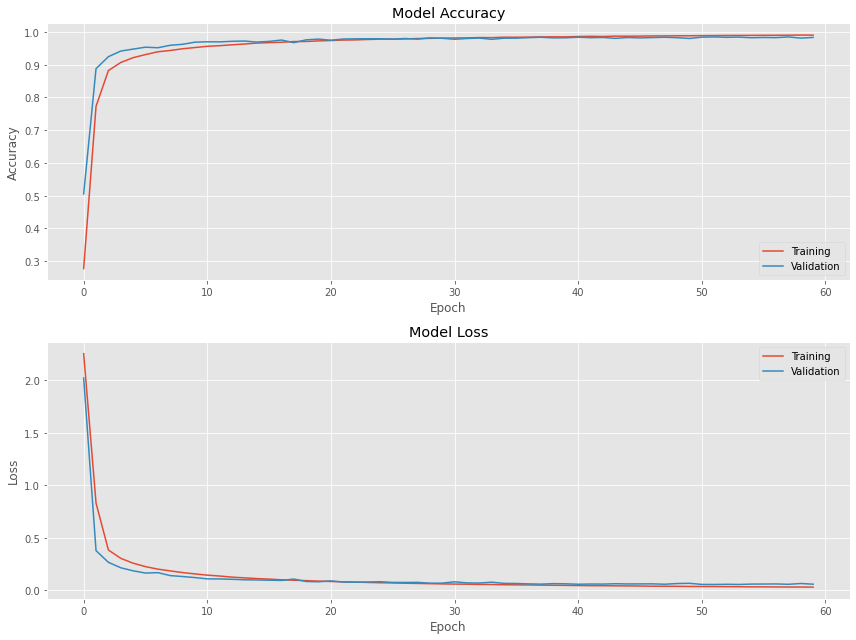

In [47]:
graph_history_training(history)



Predicted: 2, Actual: 1


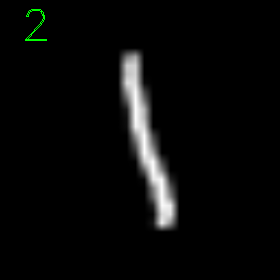



Predicted: 2, Actual: 3


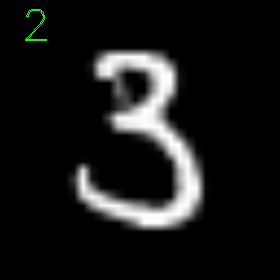



Predicted: 2, Actual: 0


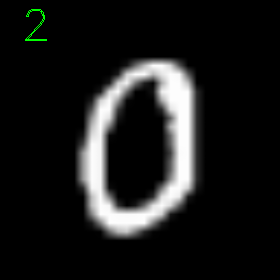



Predicted: 2, Actual: 9


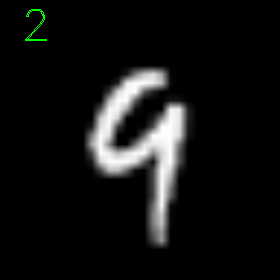



Predicted: 2, Actual: 1


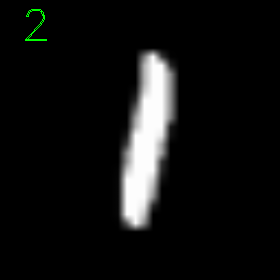



Predicted: 2, Actual: 4


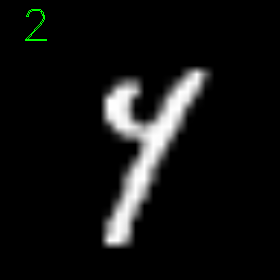



Predicted: 2, Actual: 8


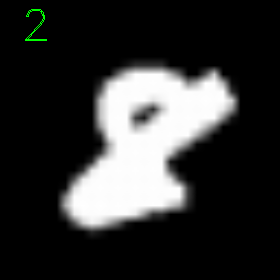



Predicted: 2, Actual: 9


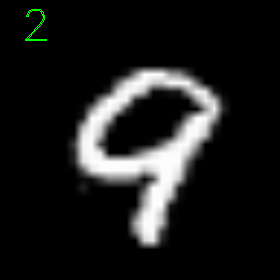



Predicted: 2, Actual: 8


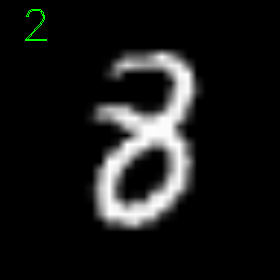



Predicted: 2, Actual: 8


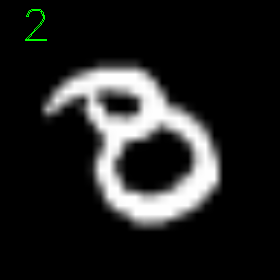

In [48]:
for i in np.random.choice(np.arange(0,len(testLabels)),size=(10,)):
  probs=model.predict(testX[np.newaxis,1])
  prediction = probs.argmax(axis=1)

  image = (testX[i]*255).astype("uint8")
  image=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)

  image = cv2.resize(image,(280,280),interpolation = cv2.INTER_LINEAR)

  cv2.putText(image,str(prediction[0]),(20,40),cv2.FONT_HERSHEY_DUPLEX,1.5,(0,255,0),1)

  print("\n")

  print("Predicted: {}, Actual: {}".format(prediction[0],np.argmax(testLabels[i])))

  cv2_imshow(image)